# Tractors Data Exploratory Data Analysis Notebook
<hr/>

## Setup Environment
<hr />

### Load Libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

import statsmodels.api as sm
import scipy.stats as stats
from datetime import datetime
import pylab
import math

### Load Data

In [2]:
df = pd.read_pickle('../../data/df_main_tractor.pickle')
print(df.shape)
#(23815, 109) - before removing proceeds > cost rows
# (23811, 109) - before adding a new column (EPA tech Year) and iunstead of using 
#               vehicle_specification_dim, we are using v_vehicle_specification_dim. 

(23809, 110)


In [3]:
# Verify we are only dealing with US data
df['company'].unique()

array(['RTS U.S.'], dtype=object)

## Data Exploration
<hr />

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23809 entries, 1 to 58844
Columns: 110 entries, vehicle_corrected_age to epa_tech_year
dtypes: float64(33), int64(30), object(47)
memory usage: 20.2+ MB


### Remove Columns not needed

In [5]:
## Net Vehicle Investment is Cost, rename
## Drop Actual_Cost
## Vehicle Specifications vs Proceed
excl_col_list = ['current_fair_market_value','country_code','company','ride_vehicle_type_desc','purchase_type',
                'age_sale_grp', 'actual_cost','proj_book_life', 'num','odometer_reading_qn','averagemilespermonth', 
                 'class', 'curr_pol_slv', 'depreciation_book_life', 'depreciation_monthly_holding', 'equivalent_unit',
                 'last_depreciation_dt', 'last_revenue_dt', 'mile_desc', 'mile_grp', 'mile_year_amt', 'pol_life', 
                 'proj_book_life', 'projected_mileage', 'ride_vehicle_group_desc', 'salvage_amt', 
                 'sam_summary_class_desc', 'sold_dt', 'veh_domicle_location_desc', 'veh_frst_rev_dt', 'vehicle_grp', 
                 'vehicle_new_flg', 'vehicle_num', 'vehicle_type_cd', 'vehicle_type_desc','engine_manufacturer_desc',
                 'engine_model_desc','model_manufacturer_cd', 'model_manufacturer_desc','vehicle_manufacturer_desc', 
                 'vehicle_sam_class_desc','vehicle_gvw_class_desc','vehicle_serial_nbr','cond_code']




for col in excl_col_list:
    if col in df.columns:
        del df[col]

In [6]:
pd.set_option('display.float_format', lambda x: '%.6f' % x) # To Disable Scientific notation
print(df.shape)
df.describe().transpose()

(23809, 67)


,count,mean,std,min,25%,50%,75%,max
vehicle_corrected_age,23809.000000,92.511697,27.803360,1.000000,82.000000,94.000000,108.000000,248.000000
odometer_rdr_corrected,5485.000000,542695.391978,189078.808389,323.000000,428549.000000,566508.000000,679514.000000,1149688.000000
accumulated_depreciation_amt,23809.000000,56906.813369,12120.887513,19546.000000,48391.000000,55085.000000,63896.000000,149900.000000
book_value_amt,23809.000000,23214.518879,9879.865627,0.000000,16348.000000,21591.000000,28604.000000,128925.000000
projected_book_life,7.000000,4.714286,3.988077,1.000000,2.000000,4.000000,6.000000,12.000000
proj_fair_market_value_amt,0.000000,nan,nan,nan,nan,nan,nan,nan
proj_book_value_amt,23809.000000,23215.306817,9879.768899,1.000000,16349.000000,21591.000000,28605.000000,128926.000000
fleet_category,0.000000,nan,nan,nan,nan,nan,nan,nan
miles_billed_nbr,2443.000000,44.904625,999.025001,-25000.000000,0.000000,0.000000,0.000000,22496.000000
utilization_perc,0.000000,nan,nan,nan,nan,nan,nan,nan


**Notes:**
- FMV derived logic from 1996. 
- For this project, we are removing it.

- Actual Cost is the "cost to sell the vehicle". 
- So we use Cost for the "cost of the vehicle when purchased" renamed in this project to "NetVehicleInvestment"
- We can drop odometer_reading_qn since it's very similar to odomoter_sale

### Rename Columns

In [7]:
df = df.rename(columns={'cost':'net_vehicle_invest','year_month':'year_month_num'})

In [8]:
df.columns

Index(['vehicle_corrected_age', 'odometer_rdr_corrected',
       'accumulated_depreciation_amt', 'book_value_amt', 'projected_book_life',
       'proj_fair_market_value_amt', 'proj_book_value_amt', 'fleet_category',
       'miles_billed_nbr', 'utilization_perc', 'vehicle_sam_class_cd',
       'sam_summary_class_cd', 'vehicle_purchase_flg', 'vehicle_inservice_dt',
       'lease_expiry_dt', 'salvage_value_amt', 'vehicle_est_engine_life',
       'body_length', 'veh_domicle_location_cd', 'depreciation_status',
       'vehicle_disp_cond_cd', 'vehicle_disp_cond_desc', 'days_to_outservice',
       'vehicle_age', 'vehicle_gvw_class_cd', 'engine_brake_model_id',
       'engine_brake_model_desc', 'drive_tire_size_cd', 'drive_tire_size_desc',
       'suspension_type_cd', 'suspension_type_desc', 'suspension_capacity',
       'rear_axle_capacity', 'transmission_manufacturer_cd',
       'transmission_manufacturer_desc', 'transmission_model_id',
       'transmission_model_desc', 'engine_manufacturer_

### Transform Data

In [9]:
#Example: 2018-06-14 00:00:00.000000
pd.options.mode.chained_assignment = None
df["accpt_date_ts"] = pd.to_datetime(df['accpt_date'],format='%Y-%m-%d 00:00:00.000000')
df["year_month_ts"] = pd.to_datetime(df['year_month_num'],format='%Y%m')
df["sale_date_ts"] = pd.to_datetime(df['sale_date'],format='%Y-%m-%d 00:00:00.000000')

In [10]:
# We create non-datetime copys for models that don't need timestamp data
#df["accpt_date"].dtypes
#df["sale_date"].dtypes

df['accpt_date_month'] = pd.DatetimeIndex(df['accpt_date']).month.astype(str)
df['accpt_date_month'] = df['accpt_date_month'].apply(lambda x: x.zfill(2))
df['sale_date_month'] = pd.DatetimeIndex(df['sale_date']).month.astype(str)
df['sale_date_month'] = df['sale_date_month'].apply(lambda x: x.zfill(2))


df['accpt_date_num'] = (pd.DatetimeIndex(df['accpt_date']).year.astype(str) + df['accpt_date_month']).astype(int)
df['sale_date_num'] = (pd.DatetimeIndex(df['sale_date']).year.astype(str) + df['sale_date_month']).astype(int)
#clean up
del df['accpt_date_month']
del df['sale_date_month']
#Duplicate Columns
del df['accpt_date']
del df['sale_date']

**Notes:**
- When the vehicle is ready for sale, the `accpt_date` is logged when it arrives. 


In [11]:
df.head(5)

,vehicle_corrected_age,odometer_rdr_corrected,accumulated_depreciation_amt,book_value_amt,projected_book_life,proj_fair_market_value_amt,proj_book_value_amt,fleet_category,miles_billed_nbr,utilization_perc,...,model_mfg,book_value,age_sale,odomoter_sale,epa_tech_year,accpt_date_ts,year_month_ts,sale_date_ts,accpt_date_num,sale_date_num
1,102,516222.000000,47657.000000,20839,nan,nan,20840,nan,nan,nan,...,STRL,20839.650000,100,345180,2004,2013-06-05,2014-01-01,2014-01-31,201306,201401
2,89,596375.000000,53383.000000,14437,nan,nan,14438,nan,nan,nan,...,FRTL,14437.680000,88,589129,2004,2014-03-05,2014-04-01,2014-04-17,201403,201404
5,89,826244.000000,57999.000000,14229,nan,nan,14230,nan,nan,nan,...,FRTL,14229.050000,88,818626,2004,2014-01-17,2014-01-01,2014-01-16,201401,201401
6,96,447885.000000,55818.000000,19438,nan,nan,19439,nan,nan,nan,...,FRTL,19438.630000,92,630302,2004,2014-01-16,2014-05-01,2014-05-16,201401,201405
10,81,nan,55153.000000,38052,nan,nan,38052,nan,nan,nan,...,FRTL,38052.430000,80,528325,2007,2015-07-24,2016-08-01,2016-08-12,201507,201608


### Verify Data Types

In [12]:
df.dtypes

vehicle_corrected_age                    int64
odometer_rdr_corrected                 float64
accumulated_depreciation_amt           float64
book_value_amt                           int64
projected_book_life                    float64
proj_fair_market_value_amt             float64
proj_book_value_amt                      int64
fleet_category                         float64
miles_billed_nbr                       float64
utilization_perc                       float64
vehicle_sam_class_cd                     int64
sam_summary_class_cd                     int64
vehicle_purchase_flg                     int64
vehicle_inservice_dt                    object
lease_expiry_dt                         object
salvage_value_amt                      float64
vehicle_est_engine_life                float64
body_length                            float64
veh_domicle_location_cd                  int64
depreciation_status                    float64
vehicle_disp_cond_cd                   float64
vehicle_disp_

**Notes:**
- year_month is the date it was sold

### Check for missing values

In [13]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #print(df.isnull().sum())
    print((df.isnull().sum()/len(df)*100).sort_values(ascending=False))
missing_values = df.columns[df.isna().any()].tolist()

fleet_category                   100.000000
reefer_rev_hrs                   100.000000
reefer_model_id                  100.000000
depreciation_status              100.000000
reefer_manufacturer_desc         100.000000
reefer_manufacturer_cd           100.000000
proj_fair_market_value_amt       100.000000
salvage_value_amt                100.000000
reefer_model_desc                100.000000
vehicle_est_engine_life          100.000000
utilization_perc                 100.000000
rear_door_type_desc               99.979000
rear_door_type_cd                 99.979000
projected_book_life               99.970599
vehicle_inservice_dt              99.970599
body_width_qn                     99.915998
body_length_qn                    99.915998
body_height_qn                    99.915998
body_length                       99.890798
aux_power_manufacturer_cd         93.628460
aux_power_model_desc              93.628460
miles_billed_nbr                  89.739174
odometer_rdr_corrected          

In [14]:
excl_col_list = ['fleet_category', 'vehicle_est_engine_life', 'reefer_manufacturer_cd', 
                 'reefer_manufacturer_desc', 'reefer_model_desc', 'reefer_model_id', 'reefer_rev_hrs', 
                 'salvage_value_amt', 'depreciation_status', 'utilization_perc', 'proj_fair_market_value_amt', 
                 'rear_door_type_cd', 'rear_door_type_desc', 'body_height_qn', 
                 'body_length_qn', 'body_width_qn', 'vehicle_inservice_dt', 'body_length', 
                 'aux_power_manufacturer_cd', 'aux_power_model_desc', 'miles_billed_nbr', 'odometer_rdr_corrected']

for col in excl_col_list:
    if col in df.columns:
        del df[col]

missing_values = df.columns[df.isna().any()].tolist()

In [15]:
df.shape

(23809, 48)

In [16]:
for cols in missing_values: 
    print(cols, " - ", round(df[cols].isnull().sum()/len(df[cols])*100,4))


projected_book_life  -  99.9706
lease_expiry_dt  -  4.0825
vehicle_disp_cond_cd  -  0.4116
vehicle_disp_cond_desc  -  0.4116
engine_brake_model_id  -  52.0685
engine_brake_model_desc  -  52.0685
drive_tire_size_cd  -  0.1554
drive_tire_size_desc  -  0.1554
suspension_type_cd  -  4.7419
suspension_type_desc  -  4.7419
suspension_capacity  -  4.7419
rear_axle_capacity  -  0.084
transmission_manufacturer_cd  -  0.0546
transmission_manufacturer_desc  -  0.0546
transmission_model_id  -  0.0546
transmission_model_desc  -  0.0546
transmission_desc  -  0.0546
transmission_speed_qn  -  0.0546
axle_total_count  -  1.0962


## Deal with missing values

### Values that we can drop

In [17]:
excl_col_list = ['engine_brake_model_desc','engine_brake_model_id']
for col in excl_col_list:
    if col in df.columns:
        del df[col]

### Duplicate Values for which we can drop the duplicate columns

In [18]:
excl_col_list = ['drive_tire_size_desc','suspension_capacity','suspension_type_desc','transmission_desc',
                'transmission_manufacturer_desc','transmission_model_desc',
                'vehicle_disp_cond_desc']
for col in excl_col_list:
    if col in df.columns:
        del df[col]

### Replace missing values with mean

#### Numerical values

In [19]:
# Numerical Variables
df['axle_total_count'] = df['axle_total_count'].fillna((df['axle_total_count'].mean()))
df['drive_tire_size_cd'] = df['drive_tire_size_cd'].fillna((df['drive_tire_size_cd'].mean()))
df['rear_axle_capacity'] = df['rear_axle_capacity'].fillna((df['rear_axle_capacity'].mean()))
df['transmission_speed_qn'] = df['transmission_speed_qn'].fillna((df['transmission_speed_qn'].mean()))



#### Categorical and Date/Time Variables

In [20]:
df['lease_expiry_dt'].unique()

array(['2013-10-18 00:00:00.000000', '2012-12-20 00:00:00.000000',
       '2012-03-19 00:00:00.000000', ..., '2021-04-14 00:00:00.000000',
       '2019-04-19 00:00:00.000000', '2019-09-15 00:00:00.000000'],
      dtype=object)

In [21]:
# We can drop this column. It does not seem valuable for the model
del df['lease_expiry_dt']

In [22]:
df['suspension_type_cd'].unique()

array(['A', 'T', nan, 'L'], dtype=object)

In [23]:
df['transmission_manufacturer_cd'].unique()

array(['FULL', 'ALLI', 'DETR', 'VOLV', 'ROCK', 'EATN', 'MACK', 'SPIC',
       nan], dtype=object)

### Replace NULL values with most popular values

#### Custom Function

In [24]:
def ShowFreqCount(colname):
    model_count = df[colname].value_counts(dropna=True, sort=True)
    for index, val in model_count.iteritems():
        print (index, val)

def ReplaceNaNMostFreq(colname):
    df[colname].fillna(df[colname].mode().iloc[0], inplace = True)
    ShowFreqCount(colname)
    

#### transmission_model_id

In [25]:
ShowFreqCount('transmission_model_id')
#print(df['transmission_model_id'].mode().iloc[0])

95511377.0 11291
93345663.0 3886
64172607.0 1782
16257280.0 958
93699239.0 716
596876053.0 646
7902829.0 495
30187478.0 361
63641761.0 337
21169747.0 216
32989687.0 177
415569503.0 176
57755100.0 155
34939769.0 151
774843110.0 140
184763543.0 132
95618646.0 120
688900663.0 116
29527501.0 107
81315207.0 105
34147364.0 100
96704157.0 100
74614176.0 91
13303213.0 85
50831987.0 68
843872593.0 67
906583208.0 56
41936232.0 54
60863777.0 53
60992570.0 53
5362715.0 48
46218279.0 46
22985113.0 44
29687867.0 39
567355135.0 39
70179755.0 38
45123393.0 33
179260833.0 32
10233243.0 31
87691267.0 30
58964043.0 26
145714855.0 26
784788660.0 25
868675467.0 24
3389589.0 24
56700676.0 23
83033292.0 23
72407697.0 21
852611839.0 21
80683728.0 19
68800991.0 18
60223962.0 16
14884.0 15
909157839.0 14
56472058.0 11
48325881.0 10
588037827.0 10
59628409.0 10
71851203.0 10
66381481.0 10
62230788.0 9
386058402.0 9
81823914.0 9
51794486.0 8
91373721.0 7
80748557.0 7
241100153.0 7
548171239.0 7
688339669.0 7
8603

In [26]:
ReplaceNaNMostFreq('transmission_model_id')

95511377.0 11304
93345663.0 3886
64172607.0 1782
16257280.0 958
93699239.0 716
596876053.0 646
7902829.0 495
30187478.0 361
63641761.0 337
21169747.0 216
32989687.0 177
415569503.0 176
57755100.0 155
34939769.0 151
774843110.0 140
184763543.0 132
95618646.0 120
688900663.0 116
29527501.0 107
81315207.0 105
34147364.0 100
96704157.0 100
74614176.0 91
13303213.0 85
50831987.0 68
843872593.0 67
906583208.0 56
41936232.0 54
60863777.0 53
60992570.0 53
5362715.0 48
46218279.0 46
22985113.0 44
29687867.0 39
567355135.0 39
70179755.0 38
45123393.0 33
179260833.0 32
10233243.0 31
87691267.0 30
58964043.0 26
145714855.0 26
784788660.0 25
868675467.0 24
3389589.0 24
56700676.0 23
83033292.0 23
72407697.0 21
852611839.0 21
80683728.0 19
68800991.0 18
60223962.0 16
14884.0 15
909157839.0 14
56472058.0 11
48325881.0 10
588037827.0 10
59628409.0 10
71851203.0 10
66381481.0 10
62230788.0 9
386058402.0 9
81823914.0 9
51794486.0 8
91373721.0 7
80748557.0 7
241100153.0 7
548171239.0 7
688339669.0 7
8603

#### vehicle_disp_cond_cd

In [27]:
ShowFreqCount('vehicle_disp_cond_cd')
#print(df['vehicle_disp_cond_cd'].mode().iloc[0])

10.0 20229
50.0 2237
30.0 1224
40.0 21


In [28]:
ReplaceNaNMostFreq('vehicle_disp_cond_cd')

10.0 20327
50.0 2237
30.0 1224
40.0 21


#### transmission_manufacturer_cd

In [29]:
ShowFreqCount('transmission_manufacturer_cd')

FULL 22142
ALLI 1282
DETR 143
ROCK 115
VOLV 74
EATN 27
MACK 12
SPIC 1


In [30]:
ReplaceNaNMostFreq('transmission_manufacturer_cd')

FULL 22155
ALLI 1282
DETR 143
ROCK 115
VOLV 74
EATN 27
MACK 12
SPIC 1


#### suspension_type_cd

In [31]:
ShowFreqCount('suspension_type_cd')

A 21644
L 965
T 71


In [32]:
ReplaceNaNMostFreq('suspension_type_cd')

A 22773
L 965
T 71


### Check if we have any more missing values

In [33]:
missing_values = df.columns[df.isna().any()].tolist()
print(missing_values)

['projected_book_life']


### Drop the _value Columns based on discussions with Debashis and team

`
book_value
    Max: 128925.52
    Min: 0.12
book_value_amt
    Max: 128925
    Min: 0
proj_book_value_amt
    Max: 128926
    Min: 1
`

Can be dropped - Oct 31 meeting and follow up email

In [34]:
excl_col_list = ['book_value','book_value_amt','proj_book_value_amt']
for col in excl_col_list:
    if col in df.columns:
        del df[col]

### Shape Check

In [35]:
df.shape

(23809, 35)

### Split data into Categorical and Numerical Data Frames for Analysis

In [36]:
# Numerical Values
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics)
df_num = df_num.fillna(0)

#Categorical Values
df_cat = df.select_dtypes(include=['object','datetime64'])

In [37]:
num_columns = df_num.columns
print(num_columns)

Index(['vehicle_corrected_age', 'accumulated_depreciation_amt',
       'projected_book_life', 'vehicle_sam_class_cd', 'sam_summary_class_cd',
       'vehicle_purchase_flg', 'veh_domicle_location_cd',
       'vehicle_disp_cond_cd', 'days_to_outservice', 'vehicle_age',
       'vehicle_gvw_class_cd', 'drive_tire_size_cd', 'rear_axle_capacity',
       'transmission_model_id', 'engine_model_id', 'engine_horsepower',
       'transmission_speed_qn', 'axle_total_count', 'year_month_num',
       'age_acpt', 'net_vehicle_invest', 'proceeds', 'model_year', 'age_sale',
       'odomoter_sale', 'accpt_date_num', 'sale_date_num'],
      dtype='object')


In [38]:
cat_columns = df_cat.columns
print(cat_columns)

Index(['suspension_type_cd', 'transmission_manufacturer_cd',
       'engine_manufacturer_cd', 'model_mfg', 'epa_tech_year', 'accpt_date_ts',
       'year_month_ts', 'sale_date_ts'],
      dtype='object')


#### Helper Functions

In [39]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data

    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot

    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()
    
def quantitative_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', ax=None, verbose=True, swarm=False):
    '''
    Helper function that gives a quick summary of quantattive data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data (usually the target variable)
    y: str. vertical axis to plot the quantitative data
    hue: str. if you want to compare it another categorical variable (usually the target variable if x is another variable)
    palette: array-like. Colour of the plot
    swarm: if swarm is set to True, a swarm plot would be overlayed
    Returns
    =======
    Quick Stats of the data and also the box plot of the distribution
    '''
    series = dataframe[y]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())
    
#     sns.boxplot(x=x, y=y, hue=hue, data=dataframe, palette=palette, ax=ax)
#     if swarm:
#         sns.swarmplot(x=x, y=y, hue=hue, data=dataframe,
#                       palette=palette, ax=ax)
#     plt.show()



In [40]:
def showFreqPlots(colname):
    fig = plt.figure(constrained_layout=False,figsize=(16,8))
    gs = fig.add_gridspec(nrows=3, ncols=3,wspace=0.9,width_ratios=[1,1,0])
    ax1 = fig.add_subplot(gs[0,0])
    ax2 = fig.add_subplot(gs[0,1])
    ax3 = fig.add_subplot(gs[1,:])
    sns.boxplot(x=df[colname],orient='v', ax=ax1)
    sns.scatterplot(x='proceeds',y=colname, data=df_num, ax=ax2)
    sns.distplot(df_num[colname], hist=True, ax=ax3)
    fig.show()
    

## Deal with outliers

In [41]:
# List of columns to investigate
df_num = df_num.loc[:,~df_num.columns.duplicated()]
num_col_names = df_num.columns
print(num_col_names)

Index(['vehicle_corrected_age', 'accumulated_depreciation_amt',
       'projected_book_life', 'vehicle_sam_class_cd', 'sam_summary_class_cd',
       'vehicle_purchase_flg', 'veh_domicle_location_cd',
       'vehicle_disp_cond_cd', 'days_to_outservice', 'vehicle_age',
       'vehicle_gvw_class_cd', 'drive_tire_size_cd', 'rear_axle_capacity',
       'transmission_model_id', 'engine_model_id', 'engine_horsepower',
       'transmission_speed_qn', 'axle_total_count', 'year_month_num',
       'age_acpt', 'net_vehicle_invest', 'proceeds', 'model_year', 'age_sale',
       'odomoter_sale', 'accpt_date_num', 'sale_date_num'],
      dtype='object')


In [42]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [43]:
for i, col_val in enumerate(num_col_names):
        print("{}\n    Max: {}\n    Min: {}".format(col_val,df_num[col_val].max(),df_num[col_val].min()))
    

vehicle_corrected_age
    Max: 248
    Min: 1
accumulated_depreciation_amt
    Max: 149900.0
    Min: 19546.0
projected_book_life
    Max: 12.0
    Min: 0.0
vehicle_sam_class_cd
    Max: 170
    Min: 130
sam_summary_class_cd
    Max: 330
    Min: 320
vehicle_purchase_flg
    Max: 1
    Min: 0
veh_domicle_location_cd
    Max: 3452
    Min: 1328
vehicle_disp_cond_cd
    Max: 50.0
    Min: 10.0
days_to_outservice
    Max: 5479
    Min: 0
vehicle_age
    Max: 345
    Min: 30
vehicle_gvw_class_cd
    Max: 8
    Min: 1
drive_tire_size_cd
    Max: 1446.0
    Min: 123.0
rear_axle_capacity
    Max: 48000.0
    Min: 2300.0
transmission_model_id
    Max: 909157839.0
    Min: 3242.0
engine_model_id
    Max: 996415284
    Min: 1298
engine_horsepower
    Max: 600.0
    Min: 145.0
transmission_speed_qn
    Max: 18.0
    Min: 3.0
axle_total_count
    Max: 4.0
    Min: 1.0
year_month_num
    Max: 201907
    Min: 201311
age_acpt
    Max: 337
    Min: 27
net_vehicle_invest
    Max: 217909
    Min: 38922


### Changing some values that does not make sense

In [44]:
df_num['axle_total_count']=df_num['axle_total_count'].replace(0,2)
df_num['axle_total_count']=df_num['axle_total_count'].replace(1,2)
df_num['transmission_speed_qn']=df_num['transmission_speed_qn'].replace(0,df_num['transmission_speed_qn'].mean())
df_num['days_to_outservice']=df_num['days_to_outservice'].replace(0,df_num['days_to_outservice'].mode())

In [45]:
df_num['days_to_outservice'].max()

5479

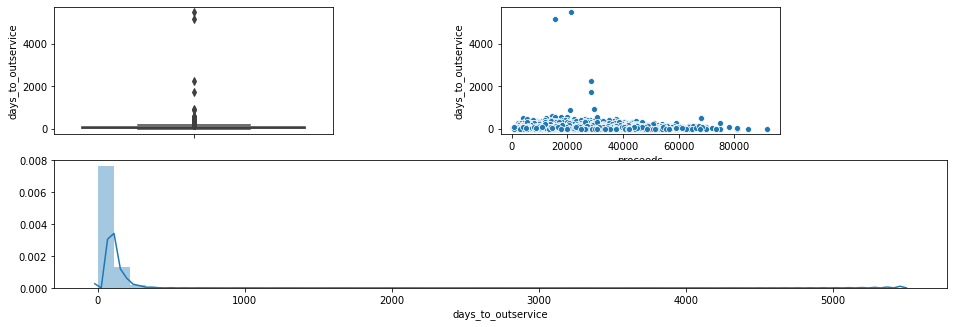

In [46]:
showFreqPlots('days_to_outservice')

### Remove outliers

**days_to_outservice_mean**

- Filter rows larger than 3 standard deviations
- Replace these row values with 95% quantile mean

In [47]:
df_num.shape

(23809, 27)

In [48]:
# From the discussion with the team, we can replace the outliers with 90 Percentile value
dto_repl_value = round(df_num.days_to_outservice[
    np.abs(
        df_num.days_to_outservice-df_num.days_to_outservice.mean()
    ) > (
        df_num['days_to_outservice'].quantile(0.90)
    )].mean())

df_num.days_to_outservice[
    np.abs(
        df_num.days_to_outservice-df_num.days_to_outservice.mean()
    ) > (
        3*df_num.days_to_outservice.std()
    )] = dto_repl_value

In [49]:
pd.set_option('display.max_columns', 500)
print(df_num['days_to_outservice'].max())
df_num.head(10)

295


,vehicle_corrected_age,accumulated_depreciation_amt,projected_book_life,vehicle_sam_class_cd,sam_summary_class_cd,vehicle_purchase_flg,veh_domicle_location_cd,vehicle_disp_cond_cd,days_to_outservice,vehicle_age,vehicle_gvw_class_cd,drive_tire_size_cd,rear_axle_capacity,transmission_model_id,engine_model_id,engine_horsepower,transmission_speed_qn,axle_total_count,year_month_num,age_acpt,net_vehicle_invest,proceeds,model_year,age_sale,odomoter_sale,accpt_date_num,sale_date_num
1,102,47657.000000,0.000000,140,320,0,2438,10.000000,5,100,8,472.000000,40000.000000,93345663.000000,54414256,380.000000,10.000000,3.000000,201401,93,68497,23000,2006,100,345180,201306,201401
2,89,53383.000000,0.000000,170,330,0,2389,10.000000,27,88,8,1102.000000,40000.000000,95511377.000000,39239775,455.000000,10.000000,3.000000,201404,87,67821,30499,2007,88,589129,201403,201404
5,89,57999.000000,0.000000,170,330,0,3408,10.000000,112,88,8,1102.000000,40000.000000,95511377.000000,39239775,455.000000,10.000000,3.000000,201401,88,72228,20000,2007,88,818626,201401,201401
6,96,55818.000000,0.000000,170,330,0,2408,10.000000,77,92,8,1102.000000,40000.000000,95511377.000000,39239775,455.000000,10.000000,3.000000,201405,88,75257,30000,2007,92,630302,201401,201405
10,81,55153.000000,0.000000,140,320,0,2709,10.000000,2,80,8,1102.000000,40000.000000,906583208.000000,393100654,400.000000,10.000000,3.000000,201608,67,93205,34402,2010,80,528325,201507,201608
12,78,74360.000000,0.000000,140,320,0,3403,10.000000,29,77,8,1373.000000,40000.000000,596876053.000000,952617676,455.000000,10.000000,3.000000,201907,74,114246,38250,2014,77,444063,201904,201907
13,125,35800.000000,0.000000,132,320,0,3172,10.000000,31,127,8,472.000000,23000.000000,32989687.000000,6919481,250.000000,9.000000,2.000000,201507,116,46014,14495,2005,123,247779,201412,201507
15,90,59106.000000,0.000000,170,330,0,2616,10.000000,192,93,8,1102.000000,40000.000000,95511377.000000,39239775,455.000000,10.000000,3.000000,201409,88,77456,34000,2007,89,726693,201408,201409
17,93,58478.000000,0.000000,140,320,0,3172,10.000000,66,90,8,975.000000,40000.000000,95511377.000000,911375872,450.000000,10.000000,3.000000,201901,89,89443,39336,2012,90,373187,201811,201812
18,98,52936.000000,0.000000,130,320,0,3289,50.000000,126,97,8,1102.000000,21000.000000,93699239.000000,949467157,310.000000,5.000000,2.000000,201808,93,63585,10000,2011,97,130009,201804,201808


In [50]:
df_num.shape

(23809, 27)

**vehicle_age**

Max: 345 - Seems high, so we 
- Replace values with mean for top 85% quartile


In [51]:
quart_vage = round(df_num['vehicle_age'].quantile(0.85))
df_num.vehicle_age[df_num.vehicle_age > quart_vage] = quart_vage
print(quart_vage)

115.0


In [52]:
pd.set_option('display.max_columns', 500)
print(df_num['vehicle_age'].max())
df_num.head(10)

115


,vehicle_corrected_age,accumulated_depreciation_amt,projected_book_life,vehicle_sam_class_cd,sam_summary_class_cd,vehicle_purchase_flg,veh_domicle_location_cd,vehicle_disp_cond_cd,days_to_outservice,vehicle_age,vehicle_gvw_class_cd,drive_tire_size_cd,rear_axle_capacity,transmission_model_id,engine_model_id,engine_horsepower,transmission_speed_qn,axle_total_count,year_month_num,age_acpt,net_vehicle_invest,proceeds,model_year,age_sale,odomoter_sale,accpt_date_num,sale_date_num
1,102,47657.000000,0.000000,140,320,0,2438,10.000000,5,100,8,472.000000,40000.000000,93345663.000000,54414256,380.000000,10.000000,3.000000,201401,93,68497,23000,2006,100,345180,201306,201401
2,89,53383.000000,0.000000,170,330,0,2389,10.000000,27,88,8,1102.000000,40000.000000,95511377.000000,39239775,455.000000,10.000000,3.000000,201404,87,67821,30499,2007,88,589129,201403,201404
5,89,57999.000000,0.000000,170,330,0,3408,10.000000,112,88,8,1102.000000,40000.000000,95511377.000000,39239775,455.000000,10.000000,3.000000,201401,88,72228,20000,2007,88,818626,201401,201401
6,96,55818.000000,0.000000,170,330,0,2408,10.000000,77,92,8,1102.000000,40000.000000,95511377.000000,39239775,455.000000,10.000000,3.000000,201405,88,75257,30000,2007,92,630302,201401,201405
10,81,55153.000000,0.000000,140,320,0,2709,10.000000,2,80,8,1102.000000,40000.000000,906583208.000000,393100654,400.000000,10.000000,3.000000,201608,67,93205,34402,2010,80,528325,201507,201608
12,78,74360.000000,0.000000,140,320,0,3403,10.000000,29,77,8,1373.000000,40000.000000,596876053.000000,952617676,455.000000,10.000000,3.000000,201907,74,114246,38250,2014,77,444063,201904,201907
13,125,35800.000000,0.000000,132,320,0,3172,10.000000,31,115,8,472.000000,23000.000000,32989687.000000,6919481,250.000000,9.000000,2.000000,201507,116,46014,14495,2005,123,247779,201412,201507
15,90,59106.000000,0.000000,170,330,0,2616,10.000000,192,93,8,1102.000000,40000.000000,95511377.000000,39239775,455.000000,10.000000,3.000000,201409,88,77456,34000,2007,89,726693,201408,201409
17,93,58478.000000,0.000000,140,320,0,3172,10.000000,66,90,8,975.000000,40000.000000,95511377.000000,911375872,450.000000,10.000000,3.000000,201901,89,89443,39336,2012,90,373187,201811,201812
18,98,52936.000000,0.000000,130,320,0,3289,50.000000,126,97,8,1102.000000,21000.000000,93699239.000000,949467157,310.000000,5.000000,2.000000,201808,93,63585,10000,2011,97,130009,201804,201808


### Check Low Values

#### First, remove odomoter_sale where it's equal to 11

In [53]:
df_num = df_num[df_num.odomoter_sale != 11]

**odomoter_sale**
- Find all rows where in the miles are below 62,000
- Replace the values with the mean of the mean of the bottom 1,000 rows

In [54]:
ods_replace = round(df_num['odomoter_sale'].nsmallest(1000).mean())
print(ods_replace)

62541


In [55]:
df_num.odomoter_sale[df_num.odomoter_sale <= 62000] = ods_replace

In [56]:
pd.set_option('display.max_columns', 500)
print(df_num['odomoter_sale'].min())
df_num.head(10)

62035


,vehicle_corrected_age,accumulated_depreciation_amt,projected_book_life,vehicle_sam_class_cd,sam_summary_class_cd,vehicle_purchase_flg,veh_domicle_location_cd,vehicle_disp_cond_cd,days_to_outservice,vehicle_age,vehicle_gvw_class_cd,drive_tire_size_cd,rear_axle_capacity,transmission_model_id,engine_model_id,engine_horsepower,transmission_speed_qn,axle_total_count,year_month_num,age_acpt,net_vehicle_invest,proceeds,model_year,age_sale,odomoter_sale,accpt_date_num,sale_date_num
1,102,47657.000000,0.000000,140,320,0,2438,10.000000,5,100,8,472.000000,40000.000000,93345663.000000,54414256,380.000000,10.000000,3.000000,201401,93,68497,23000,2006,100,345180,201306,201401
2,89,53383.000000,0.000000,170,330,0,2389,10.000000,27,88,8,1102.000000,40000.000000,95511377.000000,39239775,455.000000,10.000000,3.000000,201404,87,67821,30499,2007,88,589129,201403,201404
5,89,57999.000000,0.000000,170,330,0,3408,10.000000,112,88,8,1102.000000,40000.000000,95511377.000000,39239775,455.000000,10.000000,3.000000,201401,88,72228,20000,2007,88,818626,201401,201401
6,96,55818.000000,0.000000,170,330,0,2408,10.000000,77,92,8,1102.000000,40000.000000,95511377.000000,39239775,455.000000,10.000000,3.000000,201405,88,75257,30000,2007,92,630302,201401,201405
10,81,55153.000000,0.000000,140,320,0,2709,10.000000,2,80,8,1102.000000,40000.000000,906583208.000000,393100654,400.000000,10.000000,3.000000,201608,67,93205,34402,2010,80,528325,201507,201608
12,78,74360.000000,0.000000,140,320,0,3403,10.000000,29,77,8,1373.000000,40000.000000,596876053.000000,952617676,455.000000,10.000000,3.000000,201907,74,114246,38250,2014,77,444063,201904,201907
13,125,35800.000000,0.000000,132,320,0,3172,10.000000,31,115,8,472.000000,23000.000000,32989687.000000,6919481,250.000000,9.000000,2.000000,201507,116,46014,14495,2005,123,247779,201412,201507
15,90,59106.000000,0.000000,170,330,0,2616,10.000000,192,93,8,1102.000000,40000.000000,95511377.000000,39239775,455.000000,10.000000,3.000000,201409,88,77456,34000,2007,89,726693,201408,201409
17,93,58478.000000,0.000000,140,320,0,3172,10.000000,66,90,8,975.000000,40000.000000,95511377.000000,911375872,450.000000,10.000000,3.000000,201901,89,89443,39336,2012,90,373187,201811,201812
18,98,52936.000000,0.000000,130,320,0,3289,50.000000,126,97,8,1102.000000,21000.000000,93699239.000000,949467157,310.000000,5.000000,2.000000,201808,93,63585,10000,2011,97,130009,201804,201808


### Dealing with 0's as values

In [57]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #print(df.isnull().sum())
    print((df_num.isin([0]).sum()/len(df)*100).sort_values(ascending=False))

projected_book_life            99.957999
vehicle_purchase_flg           99.827796
days_to_outservice              6.833550
sale_date_num                   0.000000
rear_axle_capacity              0.000000
accumulated_depreciation_amt    0.000000
vehicle_sam_class_cd            0.000000
sam_summary_class_cd            0.000000
veh_domicle_location_cd         0.000000
vehicle_disp_cond_cd            0.000000
vehicle_age                     0.000000
vehicle_gvw_class_cd            0.000000
drive_tire_size_cd              0.000000
transmission_model_id           0.000000
accpt_date_num                  0.000000
engine_model_id                 0.000000
engine_horsepower               0.000000
transmission_speed_qn           0.000000
axle_total_count                0.000000
year_month_num                  0.000000
age_acpt                        0.000000
net_vehicle_invest              0.000000
proceeds                        0.000000
model_year                      0.000000
age_sale        

**Notes:**
- equivalent_unit is assigned a weigth.
  - Based on SAM class, update it. Find a similar SAM class and replace.
- Drop the vehicle_purchase_flg, it's the same as vehicle_new_flg


In [58]:
del df_num['vehicle_purchase_flg']

In [59]:
zero_values = df_num.columns[df_num.isin([0]).any().tolist()]
#print(len(zero_values))
for cols in zero_values: 
    print(cols, " - ",df_num[cols].isin([0]).sum(), ' - (', round(df_num[cols].isin([0]).sum()/len(df_num[cols])*100,4),'%)')


projected_book_life  -  23799  - ( 99.9706 %)
days_to_outservice  -  1627  - ( 6.8344 %)


In [60]:
del df_num['projected_book_life']

### Replace 0's with Mean

In [61]:
# df_num['days_to_outservice']=df_num['days_to_outservice'].replace(0,df_num['days_to_outservice'].mean())
print("From discussion with the team, days_to_outservice can have 0 and it's perfectly valid,\nso we leave it in the data as is")

From discussion with the team, days_to_outservice can have 0 and it's perfectly valid,
so we leave it in the data as is


### Check Results

In [62]:
zero_values = df_num.columns[df_num.isin([0]).any().tolist()]
for cols in zero_values: 
    print(cols, " - ",df_num[cols].isin([0]).sum(), ' - (', round(df_num[cols].isin([0]).sum()/len(df_num[cols])*100,4),'%)')


days_to_outservice  -  1627  - ( 6.8344 %)


In [63]:
print(df_num.columns.tolist())

['vehicle_corrected_age', 'accumulated_depreciation_amt', 'vehicle_sam_class_cd', 'sam_summary_class_cd', 'veh_domicle_location_cd', 'vehicle_disp_cond_cd', 'days_to_outservice', 'vehicle_age', 'vehicle_gvw_class_cd', 'drive_tire_size_cd', 'rear_axle_capacity', 'transmission_model_id', 'engine_model_id', 'engine_horsepower', 'transmission_speed_qn', 'axle_total_count', 'year_month_num', 'age_acpt', 'net_vehicle_invest', 'proceeds', 'model_year', 'age_sale', 'odomoter_sale', 'accpt_date_num', 'sale_date_num']


In [64]:
print(df_cat.columns.tolist())

['suspension_type_cd', 'transmission_manufacturer_cd', 'engine_manufacturer_cd', 'model_mfg', 'epa_tech_year', 'accpt_date_ts', 'year_month_ts', 'sale_date_ts']


## Analysis Numerical Variables

### Review the Target Variable over Time

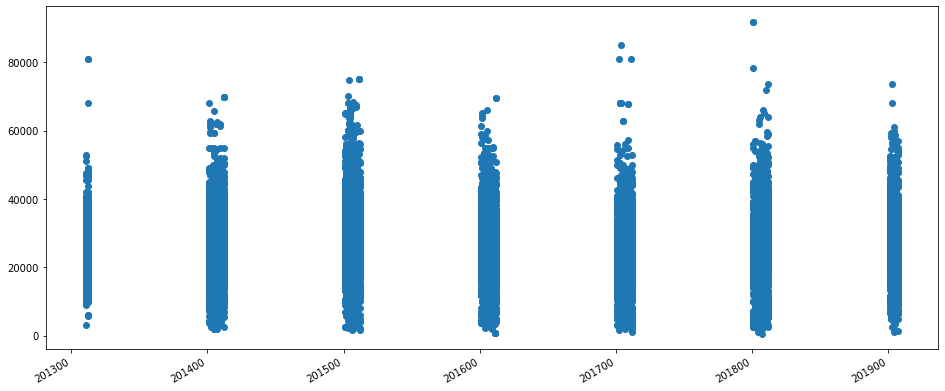

In [65]:
x = df['year_month_num']
y = df['proceeds']


# plot
fig = plt.figure(constrained_layout=False,figsize=(16,7))
plt.scatter(x,y)

# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

In [66]:
# from datetime import datetime
# from dateutil.parser import parse 

# # Prepare data
# #df["year_month"] = pd.to_datetime(df['year_month'], dayfirst=True).dt.strftime('%Y-%m')

# df['year'] = [parse(d).year for d in pd.to_datetime(df['year_month'], dayfirst=True).dt.strftime('%Y-%m')]
# df['month'] = [parse(d).strftime('%b') for d in pd.to_datetime(df['year_month'], dayfirst=True).dt.strftime('%Y-%m')]
# years = df['year'].unique()

# # Draw Plot
# #mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive', 'deeppink', 'steelblue', 'firebrick', 'mediumseagreen']      
# mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey']
# plt.figure(figsize=(16,10), dpi= 80)

# for i, y in enumerate(years):
#     plt.plot('month', 'traffic', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
#     plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'traffic'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# # Decoration
# plt.ylim(50,750)
# plt.xlim(-0.3, 11)
# plt.ylabel('$Air Traffic$')
# plt.yticks(fontsize=12, alpha=.7)
# plt.title("Monthly Seasonal Plot: Air Passengers Traffic (1949 - 1969)", fontsize=22)
# plt.grid(axis='y', alpha=.3)

# # Remove borders
# plt.gca().spines["top"].set_alpha(0.0)    
# plt.gca().spines["bottom"].set_alpha(0.5)
# plt.gca().spines["right"].set_alpha(0.0)    
# plt.gca().spines["left"].set_alpha(0.5)   
# # plt.legend(loc='upper right', ncol=2, fontsize=12)
# plt.show()

### Deal with high values

The **interquartile range (IQR)**, also called the **midspread** or middle 50%, or technically **H-spread**, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.

It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

In [67]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("The Interquartile Range (IQR):\n", IQR.astype(int).sort_values())

The Interquartile Range (IQR):
 axle_total_count                        0
vehicle_purchase_flg                    0
vehicle_disp_cond_cd                    0
transmission_speed_qn                   0
vehicle_gvw_class_cd                    0
drive_tire_size_cd                      0
rear_axle_capacity                      0
projected_book_life                     4
model_year                              4
sam_summary_class_cd                   10
age_sale                               25
vehicle_age                            25
age_acpt                               26
vehicle_corrected_age                  26
vehicle_sam_class_cd                   30
engine_horsepower                      30
days_to_outservice                     61
accpt_date_num                        298
sale_date_num                         300
year_month_num                        300
veh_domicle_location_cd               729
proceeds                            13005
accumulated_depreciation_amt        15505
ne

In [68]:
print("Q3 - 75", df['proceeds'].quantile(0.75))
print("Q2 - 50", df['proceeds'].quantile(0.50))
print("Q1 - 25", df['proceeds'].quantile(0.25))

Q3 - 75 32500.0
Q2 - 50 25600.0
Q1 - 25 19495.0


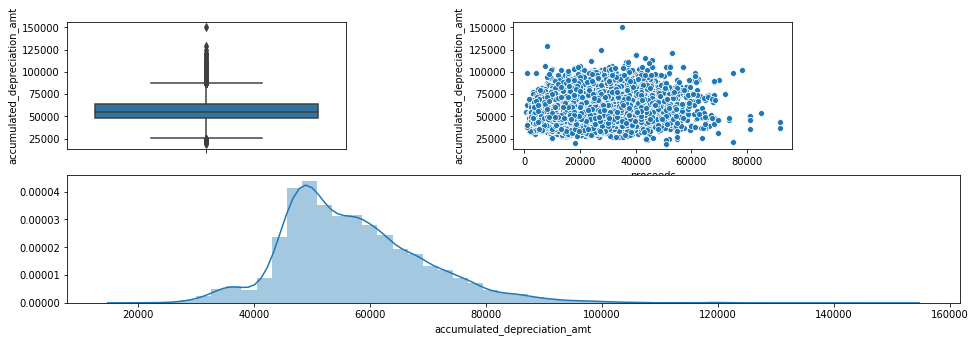

In [69]:
showFreqPlots('accumulated_depreciation_amt')

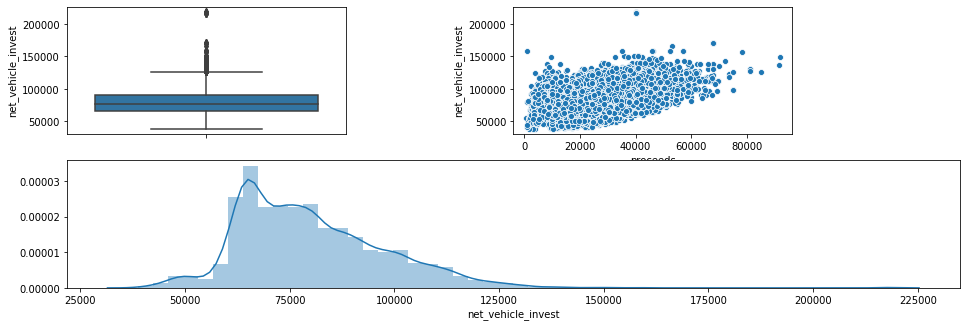

In [70]:
showFreqPlots('net_vehicle_invest')

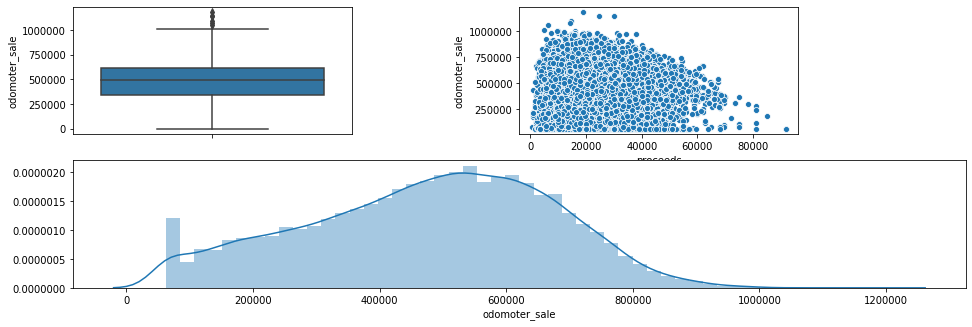

In [71]:
showFreqPlots('odomoter_sale')

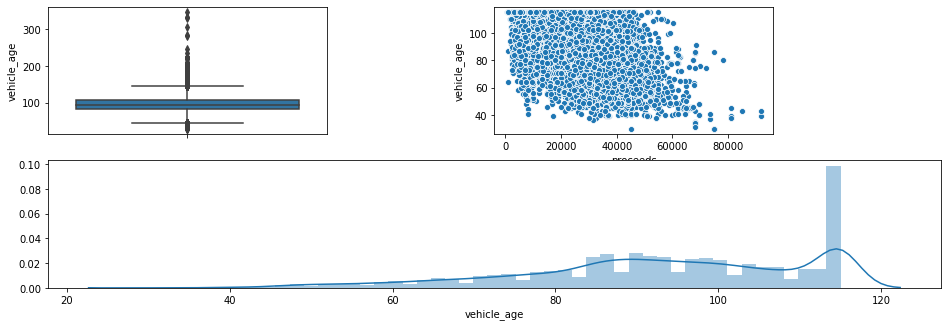

In [72]:
showFreqPlots('vehicle_age')

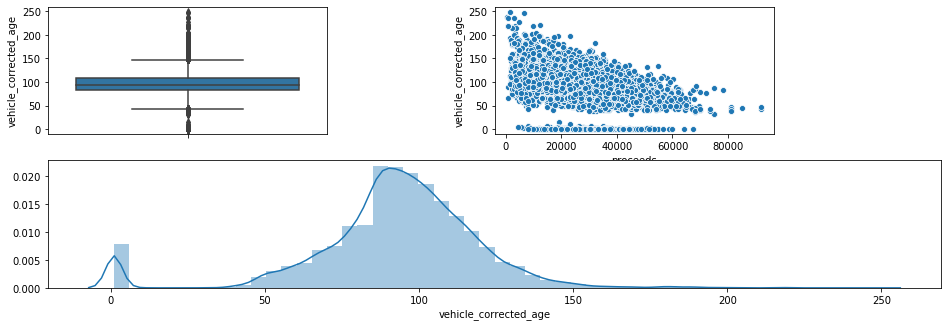

In [73]:
showFreqPlots('vehicle_corrected_age')

In [74]:
del df_num['vehicle_corrected_age']

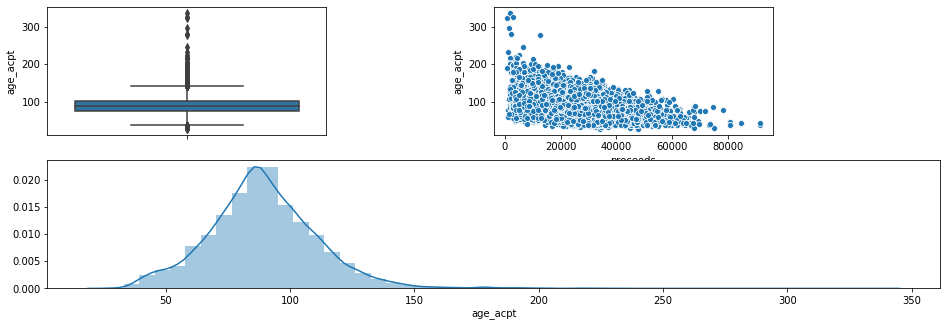

In [75]:
showFreqPlots('age_acpt') 

In [76]:
del df_num['age_acpt']

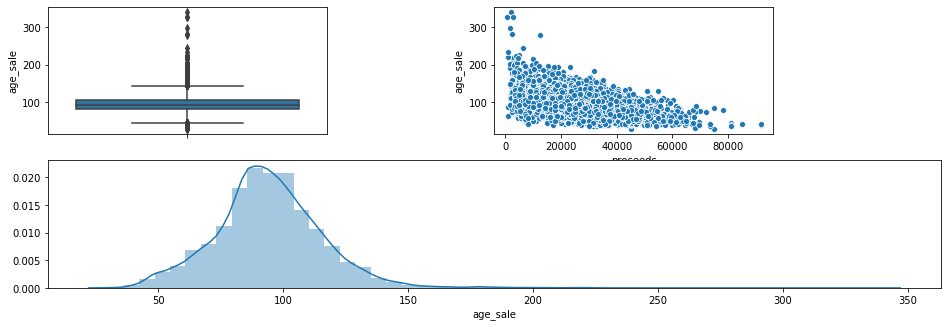

In [77]:
showFreqPlots('age_sale')

In [78]:
del df_num['age_sale']

## Analysis Categorical Variables

In [79]:
## Frequency Distribution of Values
def CatVarValueDistribution(colname):
    pd.options.display.max_rows = 1000
    model_count = df_cat[colname].value_counts(dropna=True, sort=True)
    for index, val in model_count.iteritems():
        print (index, val)

### Binning

#### model_mfg

In [80]:
def BinCateValues(colname,limit):
    main_models = []
    model_count = df_cat[colname].value_counts(dropna=True, sort=True)
    for index, val in model_count.iteritems():
        if val >= limit:
            main_models.append(index)
    # Rename all the other values not in the list to "OTHER"        
    df_cat.loc[~df_cat[colname].isin(main_models), colname] = "OTHER"
    
    pd.options.display.max_rows = 1000
    model_count = df_cat[colname].value_counts(dropna=True, sort=True)
    for index, val in model_count.iteritems():
        print (index, val)

In [81]:
CatVarValueDistribution('model_mfg')

FRTL 17303
INTL 4766
VOLV 681
OTTA 292
KENW 279
MACK 222
STRL 160
PBLT 98
CAPA 5
HEND 1
WEST 1
FCCC 1


In [82]:
BinCateValues('model_mfg',1000)

FRTL 17303
INTL 4766
OTHER 1740


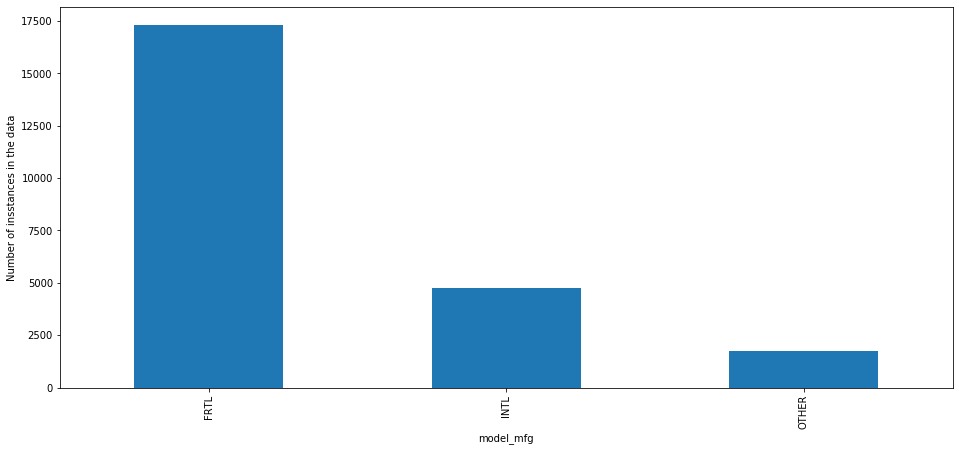

In [83]:
#Check the results visually again
mod_df = df_cat["model_mfg"].value_counts(dropna=True, sort=True)
ax = mod_df.plot.bar(figsize=(16,7))
ax.set_xlabel("model_mfg")
ax.set_ylabel("Number of insstances in the data")

plt.show()

In [84]:
CatVarValueDistribution('suspension_type_cd')

A 22773
L 965
T 71


In [85]:
CatVarValueDistribution('transmission_manufacturer_cd')

FULL 22155
ALLI 1282
DETR 143
ROCK 115
VOLV 74
EATN 27
MACK 12
SPIC 1


In [86]:
BinCateValues('transmission_manufacturer_cd',1000)

FULL 22155
ALLI 1282
OTHER 372


In [87]:
CatVarValueDistribution('engine_manufacturer_cd')

DETR 13722
CUMM 6326
CAT 2049
INTL 1033
MERC 265
MACK 222
VOLV 151
PACC 23
WEST 18


In [88]:
BinCateValues('engine_manufacturer_cd',1000)

DETR 13722
CUMM 6326
CAT 2049
INTL 1033
OTHER 679


## Save Model Results to file

In [89]:
df_cat.to_pickle('../../data/df_tractor_cat.pickle')
df_num.to_pickle('../../data/df_tractor_num.pickle')

In [90]:
# join into one dataframe
df_main = pd.concat([df_num, df_cat.reindex(df_num.index)], axis=1)
df_main.to_pickle('../../data/df_tractor.pickle')